<a href="https://colab.research.google.com/github/inoueshinichi/Book_Image_Recognition/blob/main/ch02_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 注意機構を使った特徴量抽出

In [ ]:
from PIL import Image
import numpy as np

# Googleドライブをマウント
from google.colab import drive
drive.mount('/content/drive')

# ルートディレクトリ
drive_root_dir = "drive/MyDrive/Colab Notebooks/Book_Python_DL_Recognition/data/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 特徴空間への射影

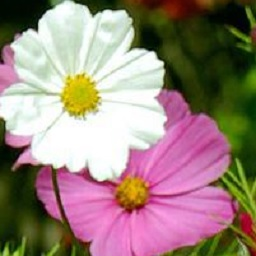

In [ ]:
# 画像の読み込み
img = Image.open(drive_root_dir + 'cosmos.jpg')
display(img)

# NumPyを使うため画像をNumPy配列に変換
img = np.asarray(img, dtype='float32')

# 画像を特徴空間に射影
w = np.array([[ 0.0065, -0.0045, -0.0018,  0.0075,
                0.0095,  0.0075, -0.0026,  0.0022],
              [-0.0065,  0.0081,  0.0097, -0.0070,
               -0.0086, -0.0107,  0.0062, -0.0050],
              [ 0.0024, -0.0018,  0.0002,  0.0023,
                0.0017,  0.0021, -0.0017,  0.0016]])
features = np.matmul(img, w)

## アテンションの計算

In [ ]:
# アテンション計算用の特徴を画像から抽出
feature_white = features[50, 50]
feature_pink = features[200, 200]

# アテンションの計算
atten_white = np.matmul(features, feature_white)
atten_pink = np.matmul(features, feature_pink)

# ソフトマックスの計算
atten_white = np.exp(atten_white) / np.sum(np.exp(atten_white))
atten_pink = np.exp(atten_pink) / np.sum(np.exp(atten_pink))

## 注意の表示

白のコスモスに対するアテンション


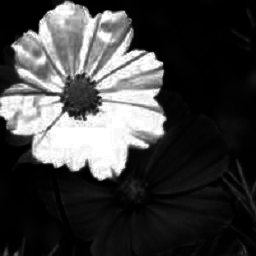

ピンクのコスモスに対するアテンション


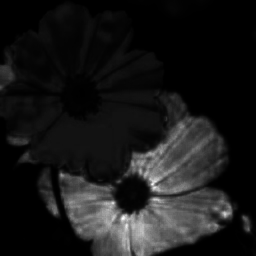

In [ ]:
# 表示用に最大・最小値で正規化
atten_white = (atten_white - np.amin(atten_white)) / \
    (np.amax(atten_white) - np.amin(atten_white))
atten_pink = (atten_pink - np.amin(atten_pink)) / \
    (np.amax(atten_pink) - np.amin(atten_pink))

# NumPy配列をPIL画像に変換
img_atten_white = Image.fromarray(
    (atten_white * 255).astype('uint8'))
img_atten_pink = Image.fromarray(
    (atten_pink * 255).astype('uint8'))

print('白のコスモスに対するアテンション')
display(img_atten_white)
print('ピンクのコスモスに対するアテンション')
display(img_atten_pink)